## Análise Exploratória de Dados

#### 1 - Importando os dados

Link do Dataset: [Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
plt.style.use('bmh')
pd.set_option('display.max_columns', 39)

In [2]:
arquivo = 'https://raw.githubusercontent.com/ryanrodr/eda-jobs-in-data/main/dados/jobs_in_data.csv'
df = pd.read_csv(arquivo)

In [3]:
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

9355 linhas e 12 colunas


In [4]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#### 2 - Limpeza e preparação dos dados

- Identificando valores ausentes NaN (Not a Number).

In [5]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.head(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M


- Removendo colunas que não vão ser utilizadas

In [7]:
df.drop(columns=['salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)

- Convertendo o tipo de dado das colunas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         9355 non-null   int64 
 1   job_title         9355 non-null   object
 2   job_category      9355 non-null   object
 3   salary_in_usd     9355 non-null   int64 
 4   experience_level  9355 non-null   object
 5   employment_type   9355 non-null   object
 6   work_setting      9355 non-null   object
 7   company_size      9355 non-null   object
dtypes: int64(2), object(6)
memory usage: 584.8+ KB


- Identificando as colunas categóricas que contenham menos de 10 valores únicos e contenham o tipo de dado 'object'

In [9]:
limite = 10

colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite and df[col].dtype == 'object']

In [10]:
colunas_categoricas

['job_category',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_size']

- Alterando o tipo de dado para 'category'

In [11]:
df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   work_year         9355 non-null   int64   
 1   job_title         9355 non-null   object  
 2   job_category      9355 non-null   category
 3   salary_in_usd     9355 non-null   int64   
 4   experience_level  9355 non-null   category
 5   employment_type   9355 non-null   category
 6   work_setting      9355 non-null   category
 7   company_size      9355 non-null   category
dtypes: category(5), int64(2), object(1)
memory usage: 266.1+ KB


#### 3 - Introdução e primeiros passos do projeto

In [13]:
df.head(3)

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person,M


- Criando uma Tabela de Frequência da contagem de cada Categoria

In [14]:
# Contando a frequência dos valores com value_counts()
frequencia = df['job_category'].value_counts()

# Contando a frequência e transformando em %
frequencia_relativa = df['job_category'].value_counts(normalize=True) * 100

print(f'{frequencia}\n\n {frequencia_relativa}')

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

 job_category
Data Science and Research         32.218065
Data Engineering                  24.158204
Data Analysis                     15.574559
Machine Learning and AI           15.264564
Leadership and Management          5.376804
BI and Visualization               3.345804
Data Architecture and Modeling     2.768573
Data Management and Strategy       0.652058
Data Quality and Operations        0.587921
Cloud and Database                 0.053447
Name: proportion, dtype: float64


In [15]:
# Criando um DataFrame com as variáveis
tabela_categoria = pd.DataFrame({'Frequência': frequencia,
                                 'Frequência Relativa (%)': frequencia_relativa})
tabela_categoria.head(4)

,Frequência,Frequência Relativa (%)
job_category,,
Data Science and Research,3014,32.218065
Data Engineering,2260,24.158204
Data Analysis,1457,15.574559
Machine Learning and AI,1428,15.264564


In [16]:
# Calculando a soma acumulada com a medida de frequência
tabela_categoria['Frequência Acumulada'] = tabela_categoria['Frequência'].cumsum()

# Calculando a frequência relativa acumulada
tabela_categoria['Frequência Relativa Acumulada (%)'] = (tabela_categoria['Frequência Acumulada'] /
                                                         tabela_categoria['Frequência'].sum()) * 100

In [17]:
tabela_categoria.rename_axis('Categoria', inplace=True)

tabela_categoria.reset_index(inplace=True)

# Centralizando a visualização da tabela
tabela_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Frequência,Frequência Relativa (%),Frequência Acumulada,Frequência Relativa Acumulada (%)
0,Data Science and Research,3014,32.218065,3014,32.218065
1,Data Engineering,2260,24.158204,5274,56.376269
2,Data Analysis,1457,15.574559,6731,71.950828
3,Machine Learning and AI,1428,15.264564,8159,87.215393
4,Leadership and Management,503,5.376804,8662,92.592197
5,BI and Visualization,313,3.345804,8975,95.938001
6,Data Architecture and Modeling,259,2.768573,9234,98.706574
7,Data Management and Strategy,61,0.652058,9295,99.358632
8,Data Quality and Operations,55,0.587921,9350,99.946553
9,Cloud and Database,5,0.053447,9355,100.000000


- Distribuição de Pareto para visualizar os dados da Tabela de Frequência 

In [18]:
# Para melhorar a visualização do nome de cada Categoria
tabela_categoria['Categoria'] = tabela_categoria['Categoria'].str.replace(' and ', '\n')

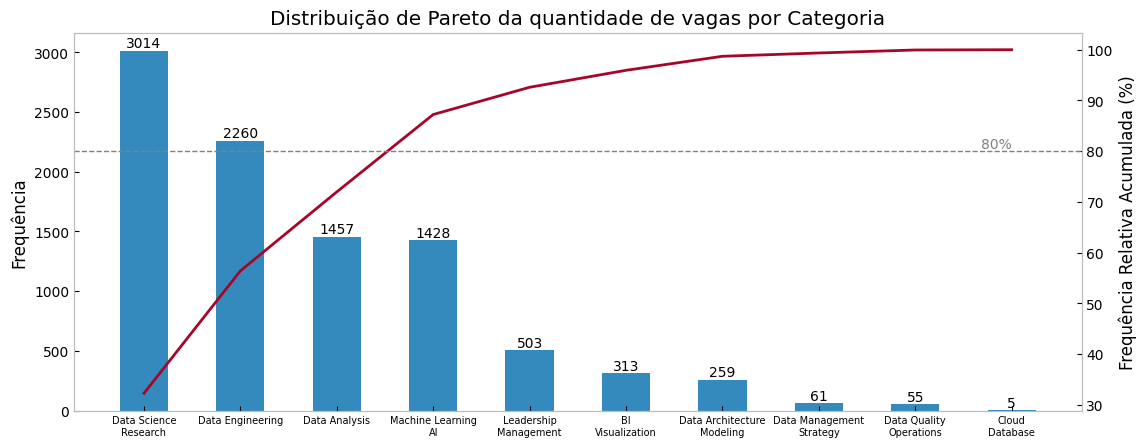

In [19]:
# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(13, 6))

# Gráfico de barras
bars = ax1.bar(tabela_categoria['Categoria'],
               tabela_categoria['Frequência'],
               color='C0',
               width=0.50)

# Adicionar rótulos de dados às barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')

# Eixo y secundário para a linha
ax2 = ax1.twinx()

# Adicionar a linha de Frequência %
ax2.plot(tabela_categoria['Categoria'],
         tabela_categoria['Frequência Relativa Acumulada (%)'],
         color='C1',
         label='Frequência Relativa Acumulada (%)')

# Adicionar linha de 80%
ax2.axhline(y=80, color='gray', linestyle='--', lw=1)
ax2.text(len(tabela_categoria)-1, 80, '80%', color='gray', va='bottom', ha='right')
ax2.tick_params(axis='y')

# Rótulos e título
ax1.set_xlabel('')
ax1.set_ylabel('Frequência')
ax2.set_ylabel('Frequência Relativa Acumulada (%)')
plt.title('Distribuição de Pareto da quantidade de vagas por Categoria')

# Definir os valores dos ticks do eixo X
ax1.set_xticks(range(len(tabela_categoria['Categoria'])))

# Definir os rótulos dos ticks do eixo X
ax1.set_xticklabels(tabela_categoria['Categoria'], fontsize=7, ha='center')

# Ajustar o espaçamento dos rótulos do eixo x
plt.subplots_adjust(bottom=0.25)

# Remover fundo e linhas de grade
ax1.set_facecolor('none')
ax1.grid(False)
ax2.grid(False)

# Exibir o gráfico
plt.show()

- Criando uma tabela de distribuição de frequências com categoria e ano

In [20]:
# crosstab para criar uma tabela cruzada com duas variáveis
tabela_dist = pd.crosstab(index= df['job_category'],
                          columns= df['work_year'],
                          aggfunc= 'count',
                          values= df['job_category'])

# Renomeando o eixo das linhas e das colunas da tabela
tabela_dist = tabela_dist.rename_axis('Categoria').rename_axis('Ano de Pesquisa', axis='columns')

# Adicionando uma coluna com os valores Totais de cada categoria
tabela_dist['Total'] = tabela_dist.sum(axis=1)

# Ordenando os dados com base na coluna Total
tabela_dist.sort_values(by='Total', ascending=False, inplace=True)

In [21]:
# Centralizando a visualização da tabela
tabela_dist.style.set_properties(**{'text-align': 'center'})

Ano de Pesquisa,2020,2021,2022,2023,Total
Categoria,,,,,
Data Science and Research,29,72,500,2413,3014
Data Engineering,17,45,499,1699,2260
Data Analysis,15,28,289,1125,1457
Machine Learning and AI,10,37,186,1195,1428
Leadership and Management,0,9,80,414,503
BI and Visualization,0,0,8,305,313
Data Architecture and Modeling,0,5,46,208,259
Data Management and Strategy,0,1,12,48,61
Data Quality and Operations,0,0,12,43,55


- Criando uma visualização da quantidade de vagas por nível de experiência

In [22]:
# Contando a frequência dos valores com value_counts()
quantidade_exp = df['experience_level'].value_counts()

# Contando a frequência e transformando em %
percentual_exp = df['experience_level'].value_counts(normalize=True) * 100

tabela_exp = pd.DataFrame({'Quantidade': quantidade_exp,
                           'Porcentagem (%)': percentual_exp})

tabela_exp = tabela_exp.reset_index().rename(columns={'experience_level': 'Experiência'})

In [23]:
# Centralizando a visualização da tabela
tabela_exp.style.set_properties(**{'text-align': 'center'})

,Experiência,Quantidade,Porcentagem (%)
0,Senior,6709,71.715660
1,Mid-level,1869,19.978621
2,Entry-level,496,5.301978
3,Executive,281,3.003741


#### 4 - Explorando visualizações com matplotlib e seaborn

- Criando uma visualização com subplots da biblioteca matplotlib.

In [24]:
tabela_categoria['Categoria'] = tabela_categoria['Categoria'].str.replace('\n', ' and ')

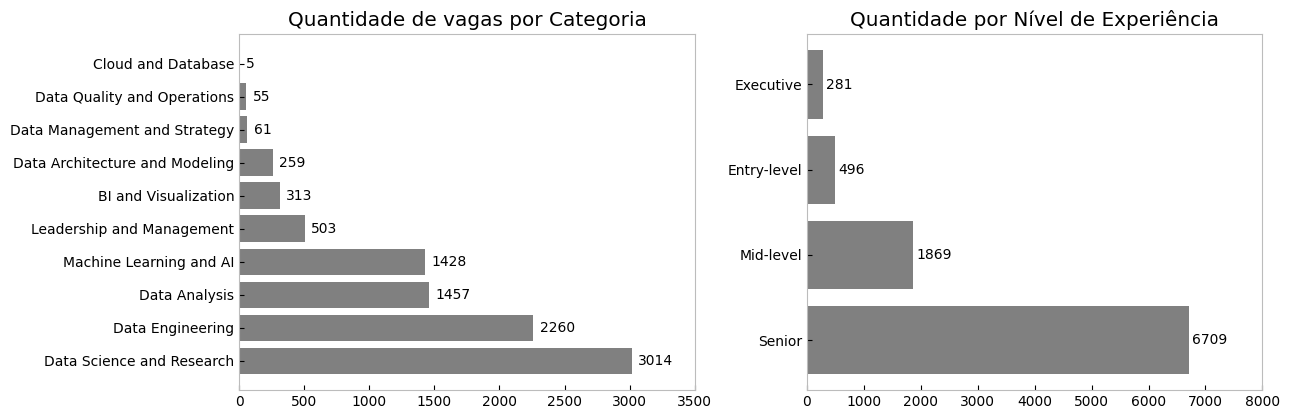

In [25]:
# Definindo o tamanho da imagem
plt.figure(figsize=(13, 8))

# Criando um gráfico de barras horizontais para Categorias
ax1 = plt.subplot(2, 2, 1)
bars1 = plt.barh(tabela_categoria['Categoria'], tabela_categoria['Frequência'], color='gray')
for i, quantidade in enumerate(tabela_categoria['Frequência']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade de vagas por Categoria')
plt.xlim(0, 3500)

# Criando um gráfico de barras horizontais para Experiência
ax2 = plt.subplot(2, 2, 2)
bars2 = plt.barh(tabela_exp['Experiência'], tabela_exp['Quantidade'], color='gray')
for i, quantidade in enumerate(tabela_exp['Quantidade']):
    plt.text(quantidade + 50, i, str(quantidade), va='center')
plt.title('Quantidade por Nível de Experiência')
plt.xlim(0, 8000)

# Remover fundo e linhas de grade
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('none')
ax2.set_facecolor('none')

# Ajustando o tamanho
plt.tight_layout()

# Exibir o gráfico
plt.show()

- Criando uma tabela de distribuição de frequências com categoria e nível de experiência

In [26]:
# Tabela de distribuição cruzada usando crosstab
tabela_dist_exp = pd.crosstab(index=df['job_category'],
                 columns=df['experience_level'],
                 aggfunc='count',
                 values=df['job_category'])

tabela_dist_exp['Total'] = tabela_dist_exp.sum(axis=1)

tabela_dist_exp = tabela_dist_exp.sort_values(by='Total', ascending=False)

tabela_dist_exp = tabela_dist_exp.rename_axis('Categoria').rename_axis('Experiência', axis='columns')

In [27]:
# Visualizando a tabela em um HeatMap
tabela_dist_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior,Total
Categoria,,,,,
Data Science and Research,164,81,499,2270,3014
Data Engineering,95,106,483,1576,2260
Data Analysis,140,16,397,904,1457
Machine Learning and AI,64,13,235,1116,1428
Leadership and Management,10,57,129,307,503
BI and Visualization,7,6,58,242,313
Data Architecture and Modeling,0,2,32,225,259
Data Management and Strategy,13,0,20,28,61
Data Quality and Operations,3,0,16,36,55


In [28]:
# Removendo a coluna Total para criar um HeatMap
tabela_dist_exp = tabela_dist_exp.drop(columns='Total', axis=1)

# Somando os totais das linhas para transformar em %
soma_linhas = tabela_dist_exp.sum(axis=1)
categoria_exp = (tabela_dist_exp.div(soma_linhas, axis=0) * 100)

- Visualizando a proporção em % das Categorias por Nível de Experiência com `style`

In [29]:
# Visualizando o DataFrame com um gradiente de cores
categoria_exp.style.background_gradient(cmap='binary')

Experiência,Entry-level,Executive,Mid-level,Senior
Categoria,,,,
Data Science and Research,5.441274,2.687459,16.556072,75.315196
Data Engineering,4.203540,4.690265,21.371681,69.734513
Data Analysis,9.608785,1.098147,27.247769,62.045299
Machine Learning and AI,4.481793,0.910364,16.456583,78.151261
Leadership and Management,1.988072,11.332008,25.646123,61.033797
BI and Visualization,2.236422,1.916933,18.530351,77.316294
Data Architecture and Modeling,0.000000,0.772201,12.355212,86.872587
Data Management and Strategy,21.311475,0.000000,32.786885,45.901639
Data Quality and Operations,5.454545,0.000000,29.090909,65.454545


- Visualizando a proporção em % das Categorias por Nível de Experiência com `seaborn`

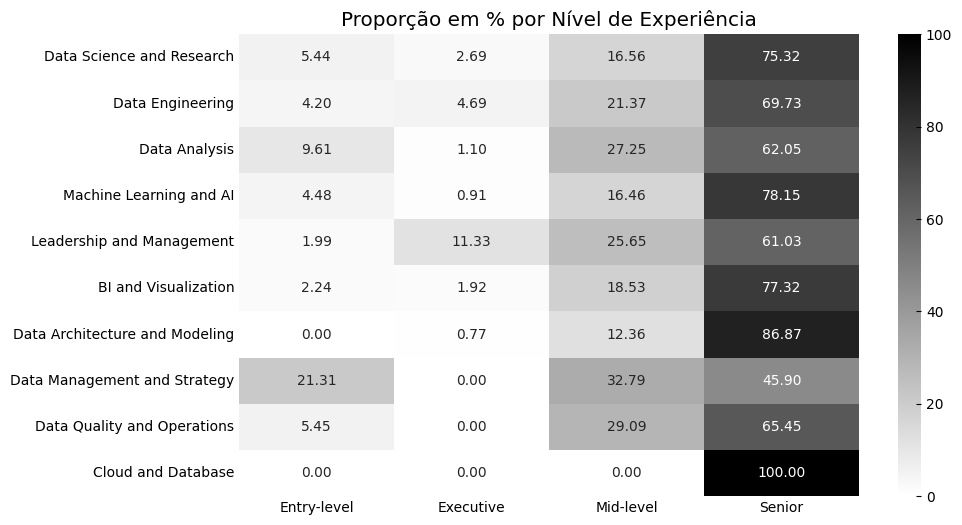

In [30]:
# Definindo o tamanho da imagem
plt.figure(figsize=(10, 6))
plt.title('Proporção em % por Nível de Experiência')

# Visualizando o DataFrame em um Heatmap
ax = sns.heatmap(data=categoria_exp, annot=True, fmt='.2f', cmap='binary')
ax.set_xlabel("") # Removendo a descrição dos eixos X e Y
ax.set_ylabel("")

# Ajustando fundo e linhas de grade
ax.set_facecolor('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Removendo os spines
for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(False);

In [31]:
tb_salario_categoria = df.groupby(['job_category'])\
                            .agg(min=pd.NamedAgg('salary_in_usd', 'min'),
                                max=pd.NamedAgg('salary_in_usd', 'max'),
                                mean=pd.NamedAgg('salary_in_usd', 'mean'))\
                            .reset_index()

tb_salario_categoria.dropna(axis=0, inplace=True)

tb_salario_categoria = tb_salario_categoria.rename(columns={'job_category': 'Categoria',
                                                            'min': 'Menor Salário',
                                                            'max': 'Maior Salário',
                                                            'mean': 'Média Salarial'})

- DataFrame Formato Largo (Wide Format)

In [32]:
# Centralizando a visualização da tabela
tb_salario_categoria.style.set_properties(**{'text-align': 'center'})

,Categoria,Menor Salário,Maior Salário,Média Salarial
0,BI and Visualization,15000,259900,135092.102236
1,Cloud and Database,115000,190000,155000.000000
2,Data Analysis,15000,430967,108505.721345
3,Data Architecture and Modeling,52500,376080,156002.359073
4,Data Engineering,18000,385000,146197.656195
5,Data Management and Strategy,46400,250000,103139.934426
6,Data Quality and Operations,23753,289120,100879.472727
7,Data Science and Research,16000,450000,163758.575979
8,Leadership and Management,20000,430640,145476.019881
9,Machine Learning and AI,15000,423000,178925.847339


- DataFrame Formato Longo (Long Format)

In [33]:
tb_salario_categoria = tb_salario_categoria.melt(id_vars="Categoria", 
                                                value_vars=["Menor Salário", "Maior Salário", "Média Salarial"], 
                                                var_name="Tipo de Salário", 
                                                value_name="Salário")

In [34]:
tb_salario_categoria.head(3)

,Categoria,Tipo de Salário,Salário
0,BI and Visualization,Menor Salário,15000.0
1,Cloud and Database,Menor Salário,115000.0
2,Data Analysis,Menor Salário,15000.0


In [35]:
tb_salario_categoria.sort_values(by='Salário', ascending=True, inplace=True)

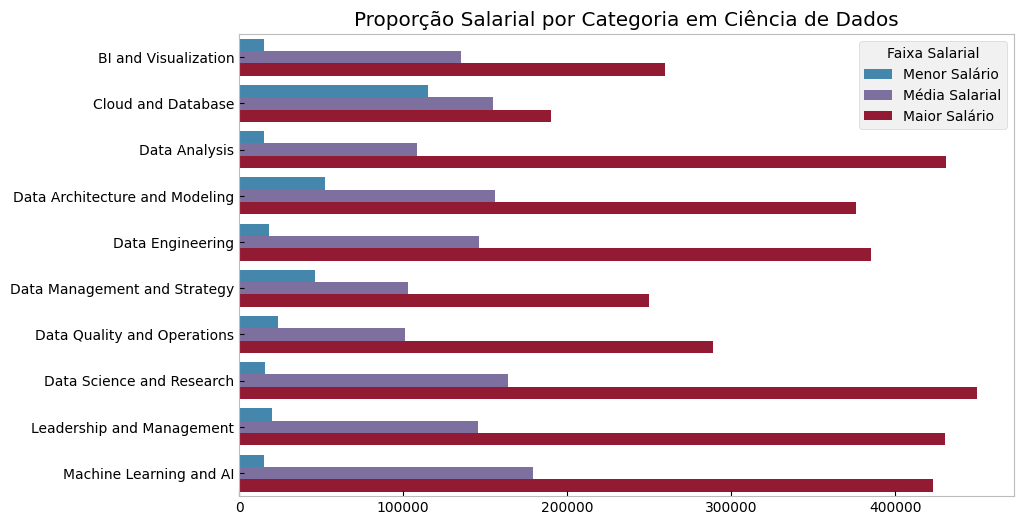

In [36]:
# Definindo o tamanho da imagem
plt.figure(figsize=(10, 6))

# Visualizando o DataFrame com Seaborn
ax = sns.barplot(data=tb_salario_categoria, y="Categoria", x="Salário", hue="Tipo de Salário", 
                palette={"Menor Salário": "C0", "Maior Salário": "C1", "Média Salarial": "C2"})

# Labels e título
plt.xlabel('Salário')
plt.ylabel('Categoria')
plt.title('Proporção Salarial por Categoria em Ciência de Dados')
plt.legend(title='Faixa Salarial')

ax.grid(False)
ax.set_facecolor('none')
ax.set_xlabel("") # Removendo a descrição dos eixos X e Y
ax.set_ylabel("")
plt.show()